# Random Forest

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import warnings
warnings.filterwarnings('once')
pd.options.display.max_columns = None
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


El código siguiente es para poder vincular el archivo de google colab con el google drive de la misma cuenta:

In [6]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [7]:
sales = pd.read_csv('sales5.csv')
sales.head()

,profit,margin,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_margin,budget_sales,market_encoding,market_size_encoding,año_encoding,Coffee,Espresso,Herbal Tea,Tea
0,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,160.0,270.0,3,0,0,1,0,0,0
1,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,130.0,210.0,3,0,0,1,0,0,0
2,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,180.0,290.0,3,0,0,1,0,0,0
3,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,160.0,260.0,3,0,0,1,0,0,0
4,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,130.0,210.0,3,0,1,1,0,0,0


Preparamos los datos de la misma manera que en el Decission Tree:

In [ ]:
X = sales.drop("profit", axis = 1)
y = sales["profit"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Estos los hiperparámetros con los que hemos construido el Decision Tree II. Los aplicamos al GridSearch y ajustamos el modelo:

In [ ]:
param = {"max_depth": [15], 
        "max_features": [4],
        "min_samples_split": [50],
        "min_samples_leaf": [25]} 

In [ ]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), 
            param_grid= param, 
            cv=10, 
            verbose=-1, 
            return_train_score = True, 
            scoring="neg_mean_squared_error") 

In [ ]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 8, 15],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [25, 100, 200],
                         'min_samples_split': [50, 200, 400]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

Aplicamos best_estimator_ para sacar el mejor bosque y lo pintamos

In [ ]:
bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=15, max_features=4, min_samples_leaf=25,
                      min_samples_split=50)

In [ ]:
for arbol in tqdm(bosque.estimators_):
    fig = plt.figure(figsize=(40, 20))
    tree.plot_tree(arbol, feature_names= x_train.columns, filled = True)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

Calcular sus métricas

In [ ]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [ ]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
   
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [ ]:
dt_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
dt_results

,MAE,MSE,RMSE,R2,set,modelo
0,10.111189,290.543652,17.045341,0.869377,test,Random Forest
1,10.342075,334.652949,18.293522,0.857496,train,Random Forest


Nos traemos los resultados de los modelos anteriores:

In [ ]:
df_LR_DT_results = pd.read_csv("resultados_sales_LR_DT.csv", index_col = 0)
df_LR_DT_results

,MAE,MSE,RMSE,R2,set,modelo
0,14.216182,622.404728,24.948041,0.720179,test,Linear Regresion
1,14.404211,611.506966,24.728667,0.739604,train,LinearRegression
0,4.392157,300.996601,17.349254,0.864678,test,Decission Tree I Noe y Lola
1,0.107809,8.462968,2.909118,0.996396,train,Decission Tree I Noe y Lola
0,13.279861,477.144629,21.843640,0.785485,test,Decision tree II Noe y Lola
1,13.036661,484.855083,22.019425,0.793536,train,Decision tree II Noe y Lola


Y los unimos todos para hacer mejor la comparativa:

In [ ]:
df_todos_resultados = pd.concat([dt_results, df_LR_DT_results], axis = 0)
df_todos_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,10.111189,290.543652,17.045341,0.869377,test,Random Forest
1,10.342075,334.652949,18.293522,0.857496,train,Random Forest
0,14.216182,622.404728,24.948041,0.720179,test,Linear Regresion
1,14.404211,611.506966,24.728667,0.739604,train,LinearRegression
0,4.392157,300.996601,17.349254,0.864678,test,Decission Tree I Noe y Lola
1,0.107809,8.462968,2.909118,0.996396,train,Decission Tree I Noe y Lola
0,13.279861,477.144629,21.843640,0.785485,test,Decision tree II Noe y Lola
1,13.036661,484.855083,22.019425,0.793536,train,Decision tree II Noe y Lola


Los guardamos en un csv:

In [ ]:
df_todos_resultados.to_csv('resultado_total_sales.csv')

Nos quedaremos con el Random Forest como mejor resultado obtenido. Pasamos a mostrar la importancia de las variables, tal y como lo hicimos con el Decission Tree:

Importancia de los predictores en el modelo
-------------------------------------------


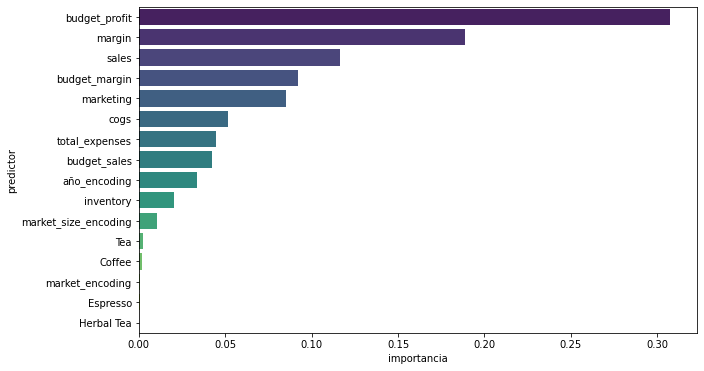

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )

importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

De la importancia de las variables podemos comentar que sigue siendo el presupuesto de beneficio la más importante, pero en este caso son decisivas margin, sales (ventas) así como marketing y los gastos. Vemos también que no ofrecen importancia en tipo de tienda(market) y dos ti`pos de producto como espresso y herbal tea.